# Train Perceptron Algorithm

1. Set $ b $ and all $ w_k $ to 0.
2. 

In [1]:
def update_w_and_b(spendings, sales, w, b, alpha):
    dl_dw = 0
    dl_db = 0
    N = len(spendings)

    for i in range(N):
        dl_dw += -2 * spendings[i] * (sales[i] - (w * spendings[i] + b))
        dl_db += -2 * (sales[i] - (w * spendings[i] + b))

    # update w and b
    w = w - (1 / float(N)) * dl_dw * alpha
    b = b - (1 / float(N)) * dl_db * alpha

    return w, b

In [2]:
def loss(spendings, sales, w, b):
    N = len(spendings)
    total_loss = 0

    for i in range(N):
        total_loss += (sales[i] - (w * spendings[i] + b)) ** 2

    return total_loss / N

In [3]:
def train(epochs, spendings, sales, w, b, alpha):
    for epoch in range(epochs):
        w, b = update_w_and_b(spendings, sales, w, b, alpha)
        if epoch % 400 == 0:
            print('epoch:', epoch, 'loss:', loss(spendings, sales, w, b))

## Dataset

In [4]:
# Generate some data
import pandas as pd
import numpy as np

df = pd.read_csv("Brand_Sales_AdSpend_Data.csv")
df

,Date,Brand Name,Country,Gross Sales,Net Sales,Total Sales,Total Ad Spend,Order Count,Return Amount
0,12/1/2023,Brand A,India,741965.00,81590.00,84590.0,7731.0000,16,84765
1,12/1/2023,Brand B,India,436999.88,397480.70,437840.0,6549.0000,30,11964
2,12/1/2023,Brand B,India,356610.67,326684.67,361550.0,4583.0000,19,6671
3,12/1/2023,Brand C,India,313971.46,313971.46,332050.0,3610.0000,28,5420
4,12/1/2023,Brand A,India,280979.00,280979.00,280979.0,8287.0000,6,9958
...,...,...,...,...,...,...,...,...,...
1671,5/31/2024,Brand D,SA,39310.00,9488.00,19933.0,6538.4800,5,1201
1672,5/31/2024,Brand A,SA,10677.00,23560.00,37284.0,6346.6668,6,13367
1673,5/31/2024,Brand D,SA,33782.00,23298.00,36346.0,5369.5000,8,1675
1674,5/31/2024,Brand E,SA,24212.00,13746.00,23728.0,4710.9400,4,7544


In [5]:
df["Total Sales"].isnull().sum()

np.int64(0)

In [8]:
# Change the column names Total Ad Spend\xa0 to Total Ad Spend
df["Total Ad Spend\xa0"].isnull().sum()

np.int64(0)

In [11]:
# Initialize the weights and bias
X = df["Total Ad Spend\xa0"].to_list()
y = df["Total Sales"].to_list()
X, y

([7731.0,
  6549.0,
  4583.0,
  3610.0,
  8287.0,
  5695.0,
  8451.0,
  5643.0,
  6933.0,
  8257.0,
  4168.0,
  3001.0,
  5467.0,
  3417.0,
  4030.0,
  7077.0,
  8577.0,
  8563.0,
  3910.0,
  7099.0,
  8025.0,
  4971.0,
  6828.0,
  4757.0,
  7624.0,
  7810.0,
  8065.0,
  8571.0,
  7484.0,
  6445.0,
  8999.0,
  5527.0,
  3261.0,
  5976.0,
  4613.0,
  4793.0,
  6083.0,
  7915.0,
  3241.0,
  4626.0,
  7446.0,
  5187.0,
  6271.0,
  3247.0,
  6719.0,
  4084.0,
  4497.0,
  3190.0,
  8883.0,
  5353.0,
  4370.0,
  6593.0,
  6807.0,
  6486.0,
  7700.0,
  8060.0,
  7796.0,
  7193.0,
  8339.0,
  4053.0,
  4150.0,
  4273.0,
  7036.0,
  5284.0,
  4291.0,
  8430.0,
  8990.0,
  3283.0,
  6400.0,
  6136.0,
  5686.0,
  8250.0,
  4685.0,
  4423.0,
  5316.0,
  6335.0,
  7196.0,
  7341.0,
  6485.0,
  6791.0,
  3600.0,
  6010.0,
  8022.0,
  8904.0,
  7563.0,
  3443.0,
  5493.0,
  5219.0,
  3192.0,
  4835.0,
  6488.0,
  7480.0,
  6670.0,
  5680.0,
  5914.0,
  8638.0,
  6330.0,
  3941.0,
  7385.0,
  6567.0,


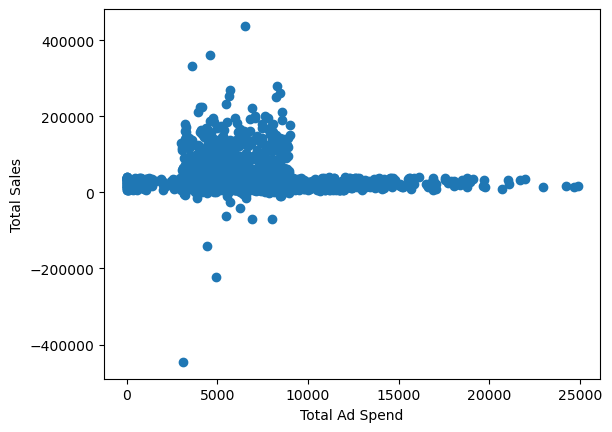

In [13]:
# Plot the data
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.xlabel("Total Ad Spend")
plt.ylabel("Total Sales")
plt.show()

In [12]:
w = 0
b = 0
train(epochs=2000, spendings=X, sales=y, w=w, b=b, alpha=0.00001)

epoch: 0 loss: 1536687933254889.5
epoch: 400 loss: nan
epoch: 800 loss: nan
epoch: 1200 loss: nan
epoch: 1600 loss: nan
